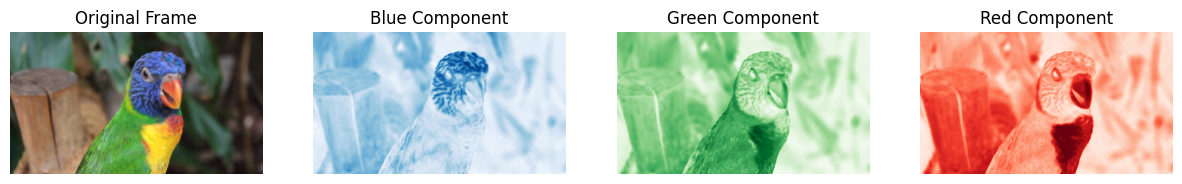

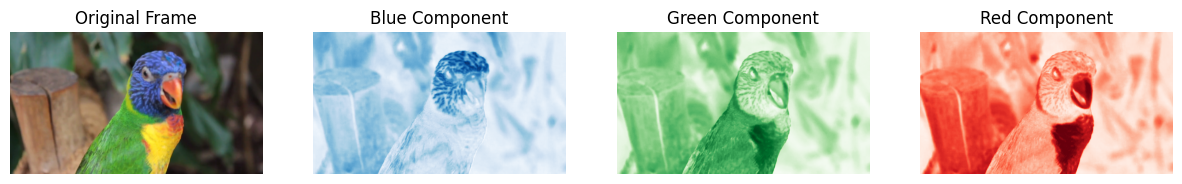

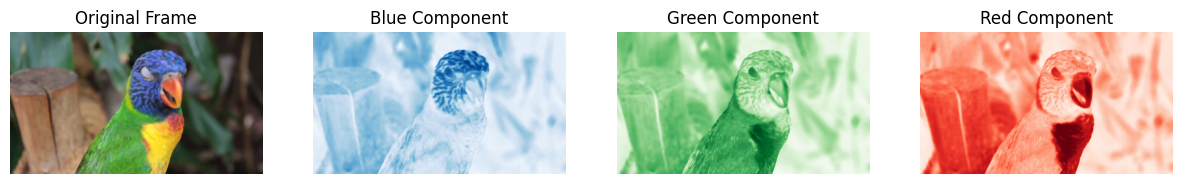

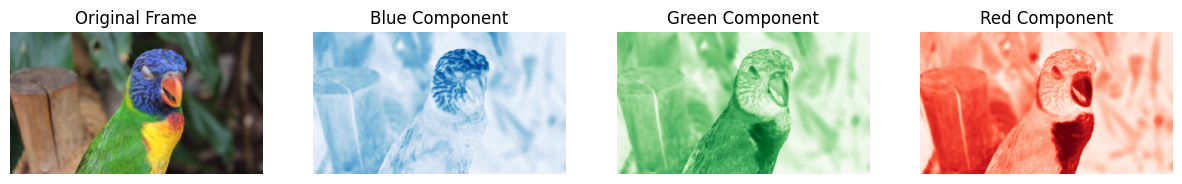

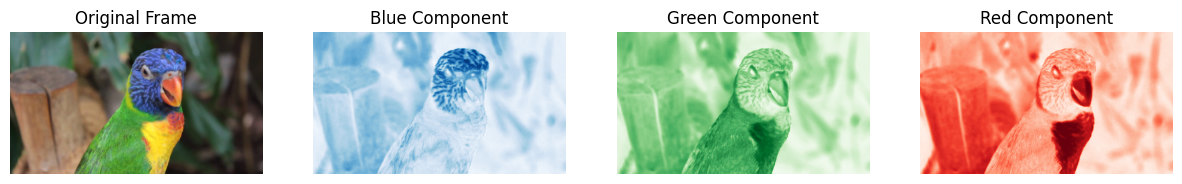

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to video
video_path = 'parrot.mp4' 
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print("Error opening video file")
    exit()

# Create a directory to save the color components
output_dir = 'color_components'
os.makedirs(output_dir, exist_ok=True)

# Iterate through the video frames
frame_count = 0
while True:
    # Read a frame from the video
    ret, frame = cap.read()

    # Check if the frame was read successfully
    if not ret:
        break

    # Split the frame into color components (BGR)
    b, g, r = cv2.split(frame)

    # Save the color components as separate images
    cv2.imwrite(os.path.join(output_dir, f'frame_{frame_count}_blue.jpg'), b)
    cv2.imwrite(os.path.join(output_dir, f'frame_{frame_count}_green.jpg'), g)
    cv2.imwrite(os.path.join(output_dir, f'frame_{frame_count}_red.jpg'), r)

    frame_count += 1

    # Display a few frames with their color components using Matplotlib
    if frame_count <= 5:
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        axes[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Original Frame')
        axes[0].axis('off')

        axes[1].imshow(b, cmap='Blues')
        axes[1].set_title('Blue Component')
        axes[1].axis('off')

        axes[2].imshow(g, cmap='Greens')
        axes[2].set_title('Green Component')
        axes[2].axis('off')

        axes[3].imshow(r, cmap='Reds')
        axes[3].set_title('Red Component')
        axes[3].axis('off')

        plt.show()

    # Break after displaying 5 frames
    if frame_count == 5:
        break

# Release resources
cap.release()
